# IMPORTING LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pylab as plb
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler, Normalizer

# LOADING DATASET

In [2]:
df = pd.read_csv('CleanedGlobalTerrorism.csv')
df.head()

,Year,Month,Day,Extended,Country,Region,City,Success,Suicide,Attack_Type,Target_Type,Target_Subtype,Target,Target_Nationality,Attack_Group,Weapon,No_Of_Killed,No_Of_Wounded,Property
0,1970,7,2,0,Dominican Republic,Central America & Caribbean,Santo Domingo,1,0,Assassination,Private Citizens & Property,Named Civilian,Julio Guzman,Dominican Republic,MANO-D,Unknown,1.0,0.0,0
1,1970,0,0,0,Mexico,North America,Mexico city,1,0,Hostage Taking (Kidnapping),Government (Diplomatic),"Diplomatic Personnel (outside of embassy, cons...","Nadine Chaval, daughter",Belgium,23rd of September Communist League,Unknown,0.0,0.0,0
2,1970,1,0,0,Philippines,Southeast Asia,Unknown,1,0,Assassination,Journalists & Media,Radio Journalist/Staff/Facility,Employee,United States,Unknown,Unknown,1.0,0.0,0
3,1970,1,0,0,Greece,Western Europe,Athens,1,0,Bombing/Explosion,Government (Diplomatic),Embassy/Consulate,U.S. Embassy,United States,Unknown,Explosives,0.0,0.0,1
4,1970,1,0,0,Japan,East Asia,Fukouka,1,0,Facility/Infrastructure Attack,Government (Diplomatic),Embassy/Consulate,U.S. Consulate,United States,Unknown,Incendiary,0.0,0.0,1


In [3]:
#LOADING THE RAW DATASET WITHOUT ANY CLEANING DONE
dff= pd.read_csv('globalterrorism.csv')
dff.head()

C:\Users\hp\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


# EXPLORATORY DATA ANALYSIS ON THE RAW DATASET

In [4]:
#DROPPING SOME REDUDANT COLUMNS
dff=  dff.drop(columns= ['approxdate','resolution','location'])
dff=  dff.drop(columns=['alternative','alternative_txt','attacktype2','attacktype2_txt','attacktype3','attacktype3_txt','targsubtype1','targsubtype1_txt'])
dff=  dff.drop(columns= ['targtype2', 'targtype2_txt', 'targsubtype2',
       'targsubtype2_txt', 'corp2', 'target2', 'natlty2', 'natlty2_txt',
       'targtype3', 'targtype3_txt', 'targsubtype3', 'targsubtype3_txt',
       'corp3', 'target3', 'natlty3', 'natlty3_txt', 'gsubname',
       'gname2'])
dff=  dff.drop(columns= ['gsubname2', 'gname3', 'gsubname3', 'motive',
       'guncertain2', 'guncertain3',
       'claimed', 'claimmode', 'claimmode_txt', 'claim2', 'claimmode2',
       'claimmode2_txt', 'claim3', 'claimmode3', 'claimmode3_txt',
       'compclaim'])
dff=  dff.drop(columns= ['weaptype2', 'weaptype2_txt', 'weapsubtype2', 'weapsubtype2_txt',
       'weaptype3', 'weaptype3_txt', 'weapsubtype3', 'weapsubtype3_txt',
       'weaptype4', 'weaptype4_txt', 'weapsubtype4', 'weapsubtype4_txt'])
dff=  dff.drop(columns= ['propextent',
       'propextent_txt', 'propvalue', 'propcomment', 'nhostkid',
       'nhostkidus', 'nhours', 'ndays', 'divert', 'kidhijcountry', 'ransom',
       'ransomamt', 'ransomamtus', 'ransompaid', 'ransompaidus'])
dff=  dff.drop(columns= ['ransomnote', 'hostkidoutcome', 'hostkidoutcome_txt', 'nreleased',
       'addnotes', 'scite2', 'scite3', 'related'])

In [5]:
dff=  dff.drop(columns= ['eventid', 'iyear', 'imonth', 'iday', 'extended',
       'country_txt', 'region_txt', 'provstate', 'city', 'latitude',
       'longitude', 'specificity', 'vicinity', 'summary', 'crit1', 'crit2',
       'crit3', 'doubtterr', 'multiple', 'success', 'suicide',
       'attacktype1_txt', 'targtype1_txt', 'corp1','natlty1_txt', 'guncertain1', 'individual',
       'nperps', 'nperpcap', 'weaptype1_txt', 'weapsubtype1',
       'weapsubtype1_txt', 'weapdetail', 'nkill', 'nkillus', 'nkillter',
       'nwound', 'nwoundus', 'nwoundte', 'property', 'ishostkid', 'scite1',
       'dbsource', 'INT_LOG', 'INT_IDEO', 'INT_MISC', 'INT_ANY'])

In [6]:
#CHECKING FOR THE NUMBER OF FEATURES
dff.shape

(181691, 8)

In [7]:
#CHECKING FOR THE COLUMN NAMES OF THE FEATURES
dff.columns

Index(['country', 'region', 'attacktype1', 'targtype1', 'target1', 'natlty1',
       'gname', 'weaptype1'],
      dtype='object')

In [8]:
#TREATING FOR MISSING VALUES ON THE RAW DATASET
dff['natlty1'].fillna(value=dff['natlty1'].median(), inplace=True)
dff['target1'].fillna('Unknown',inplace=True)

In [9]:
#MERGING THE PREVIOUSLY CLEANED DATASET(DF) TO THE NEWLY CLEANED DATASET(DFF)
clean_df = pd.concat([df, dff], axis=1)
clean_df.head()

,Year,Month,Day,Extended,Country,Region,City,Success,Suicide,Attack_Type,...,No_Of_Wounded,Property,country,region,attacktype1,targtype1,target1,natlty1,gname,weaptype1
0,1970,7,2,0,Dominican Republic,Central America & Caribbean,Santo Domingo,1,0,Assassination,...,0.0,0,58,2,1,14,Julio Guzman,58.0,MANO-D,13
1,1970,0,0,0,Mexico,North America,Mexico city,1,0,Hostage Taking (Kidnapping),...,0.0,0,130,1,6,7,"Nadine Chaval, daughter",21.0,23rd of September Communist League,13
2,1970,1,0,0,Philippines,Southeast Asia,Unknown,1,0,Assassination,...,0.0,0,160,5,1,10,Employee,217.0,Unknown,13
3,1970,1,0,0,Greece,Western Europe,Athens,1,0,Bombing/Explosion,...,0.0,1,78,8,3,7,U.S. Embassy,217.0,Unknown,6
4,1970,1,0,0,Japan,East Asia,Fukouka,1,0,Facility/Infrastructure Attack,...,0.0,1,101,4,7,7,U.S. Consulate,217.0,Unknown,8


In [10]:
#CHECKING FOR THE COLUMN NAMES OF THE NEWLY CLEANED DATASET AFTER MERGING
clean_df.columns

Index(['Year', 'Month', 'Day', 'Extended', 'Country', 'Region', 'City',
       'Success', 'Suicide', 'Attack_Type', 'Target_Type', 'Target_Subtype',
       'Target', 'Target_Nationality', 'Attack_Group', 'Weapon',
       'No_Of_Killed', 'No_Of_Wounded', 'Property', 'country', 'region',
       'attacktype1', 'targtype1', 'target1', 'natlty1', 'gname', 'weaptype1'],
      dtype='object')

In [11]:
#CHECKING FOR THE NUMBER OF FEATURES
clean_df.shape

(181691, 27)

In [12]:
#CHECKING FOR THE DATA TYPE OF THE CLEAN DATASET
clean_df.dtypes

Year                    int64
Month                   int64
Day                     int64
Extended                int64
Country                object
Region                 object
City                   object
Success                 int64
Suicide                 int64
Attack_Type            object
Target_Type            object
Target_Subtype         object
Target                 object
Target_Nationality     object
Attack_Group           object
Weapon                 object
No_Of_Killed          float64
No_Of_Wounded         float64
Property                int64
country                 int64
region                  int64
attacktype1             int64
targtype1               int64
target1                object
natlty1               float64
gname                  object
weaptype1               int64
dtype: object

In [13]:
#CHECKING FOR MISSING VALUES ON THE CLEAN DATASET
clean_df.isna().sum()

Year                  0
Month                 0
Day                   0
Extended              0
Country               0
Region                0
City                  0
Success               0
Suicide               0
Attack_Type           0
Target_Type           0
Target_Subtype        0
Target                0
Target_Nationality    0
Attack_Group          0
Weapon                0
No_Of_Killed          0
No_Of_Wounded         0
Property              0
country               0
region                0
attacktype1           0
targtype1             0
target1               0
natlty1               0
gname                 0
weaptype1             0
dtype: int64

In [14]:
#CHECKING FOR THE NUMBER OF UNIQUE ELEMENTS ON THE FEATURES
clean_df.nunique()

Year                     47
Month                    13
Day                      32
Extended                  2
Country                 205
Region                   12
City                  36674
Success                   2
Suicide                   2
Attack_Type               9
Target_Type              22
Target_Subtype          113
Target                86006
Target_Nationality      216
Attack_Group           3537
Weapon                   12
No_Of_Killed            205
No_Of_Wounded           238
Property                  3
country                 205
region                   12
attacktype1               9
targtype1                22
target1               86006
natlty1                 215
gname                  3537
weaptype1                12
dtype: int64

In [15]:
#CHECKING TO SEE THE STATISTICS ON THE DATASET
clean_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,181691.0,2002.638997,13.259430,1970.0,1991.0,2009.0,2014.0,2017.0
Month,181691.0,6.467277,3.388303,0.0,4.0,6.0,9.0,12.0
Day,181691.0,15.505644,8.814045,0.0,8.0,15.0,23.0,31.0
Extended,181691.0,0.045346,0.208063,0.0,0.0,0.0,0.0,1.0
Success,181691.0,0.889598,0.313391,0.0,1.0,1.0,1.0,1.0
Suicide,181691.0,0.036507,0.187549,0.0,0.0,0.0,0.0,1.0
No_Of_Killed,181691.0,2.266860,11.227057,0.0,0.0,0.0,2.0,1570.0
No_Of_Wounded,181691.0,2.883296,34.309747,0.0,0.0,0.0,2.0,8191.0
Property,181691.0,-0.544556,3.122889,-9.0,0.0,1.0,1.0,1.0
country,181691.0,131.968501,112.414535,4.0,78.0,98.0,160.0,1004.0


In [16]:
#CHECKING TO SEE THE RELATIONSHIP THAT EXIST BETWEEN THE FEATURES
clean_df.corr()

,Year,Month,Day,Extended,Success,Suicide,No_Of_Killed,No_Of_Wounded,Property,country,region,attacktype1,targtype1,natlty1,weaptype1
Year,1.000000,0.000139,0.018254,0.091754,-0.082963,0.137736,0.021252,0.017484,-0.278916,-0.135023,0.401384,0.074153,0.079082,-0.019855,-0.011737
Month,0.000139,1.000000,0.005497,-0.000468,-0.002845,0.003071,0.004031,0.003178,-0.005816,-0.006305,-0.002999,0.006705,-0.000948,-0.004783,0.007863
Day,0.018254,0.005497,1.000000,-0.004700,-0.011802,0.003593,-0.003225,-0.001082,-0.003903,0.003468,0.009710,-0.005333,-0.000052,0.003724,-0.003019
Extended,0.091754,-0.000468,-0.004700,1.000000,0.073233,-0.033961,0.014586,-0.010175,-0.002096,-0.020466,0.038389,0.272272,0.011613,0.013918,0.207802
Success,-0.082963,-0.002845,-0.011802,0.073233,1.000000,-0.031155,0.049619,0.023346,-0.036876,-0.037827,-0.030909,0.048408,-0.059637,-0.004888,-0.008178
Suicide,0.137736,0.003071,0.003593,-0.033961,-0.031155,1.000000,0.136385,0.096101,-0.073382,-0.050360,0.112672,-0.029962,-0.023440,-0.009709,-0.039928
No_Of_Killed,0.021252,0.004031,-0.003225,0.014586,0.049619,0.136385,1.000000,0.443326,-0.016816,-0.014383,0.043113,-0.003448,0.008466,0.001313,-0.001528
No_Of_Wounded,0.017484,0.003178,-0.001082,-0.010175,0.023346,0.096101,0.443326,1.000000,-0.012557,-0.006351,0.019211,-0.001424,0.010709,-0.000500,-0.011055
Property,-0.278916,-0.005816,-0.003903,-0.002096,-0.036876,-0.073382,-0.016816,-0.012557,1.000000,0.032051,-0.183279,0.031976,0.004897,-0.000926,0.018999
country,-0.135023,-0.006305,0.003468,-0.020466,-0.037827,-0.050360,-0.014383,-0.006351,0.032051,1.000000,0.148597,-0.021384,-0.019703,0.598196,-0.023708


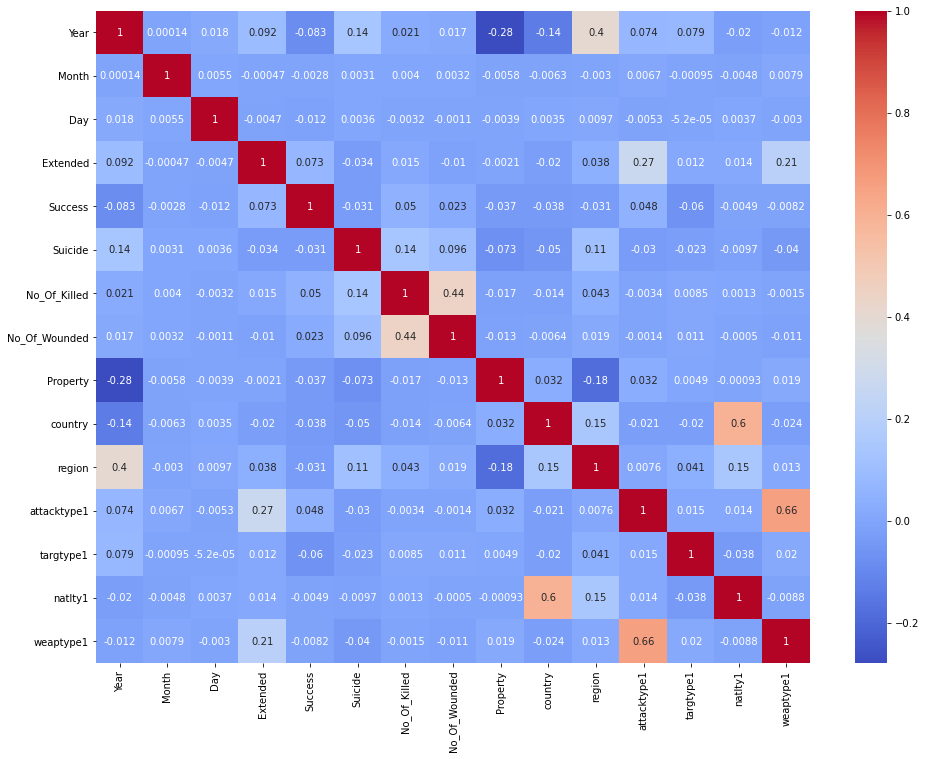

In [17]:
plt.figure(figsize=(16,12))
sns.heatmap(clean_df.corr(), cmap = 'coolwarm', annot = True)
plt.show()

# DATA VISUALIZATION

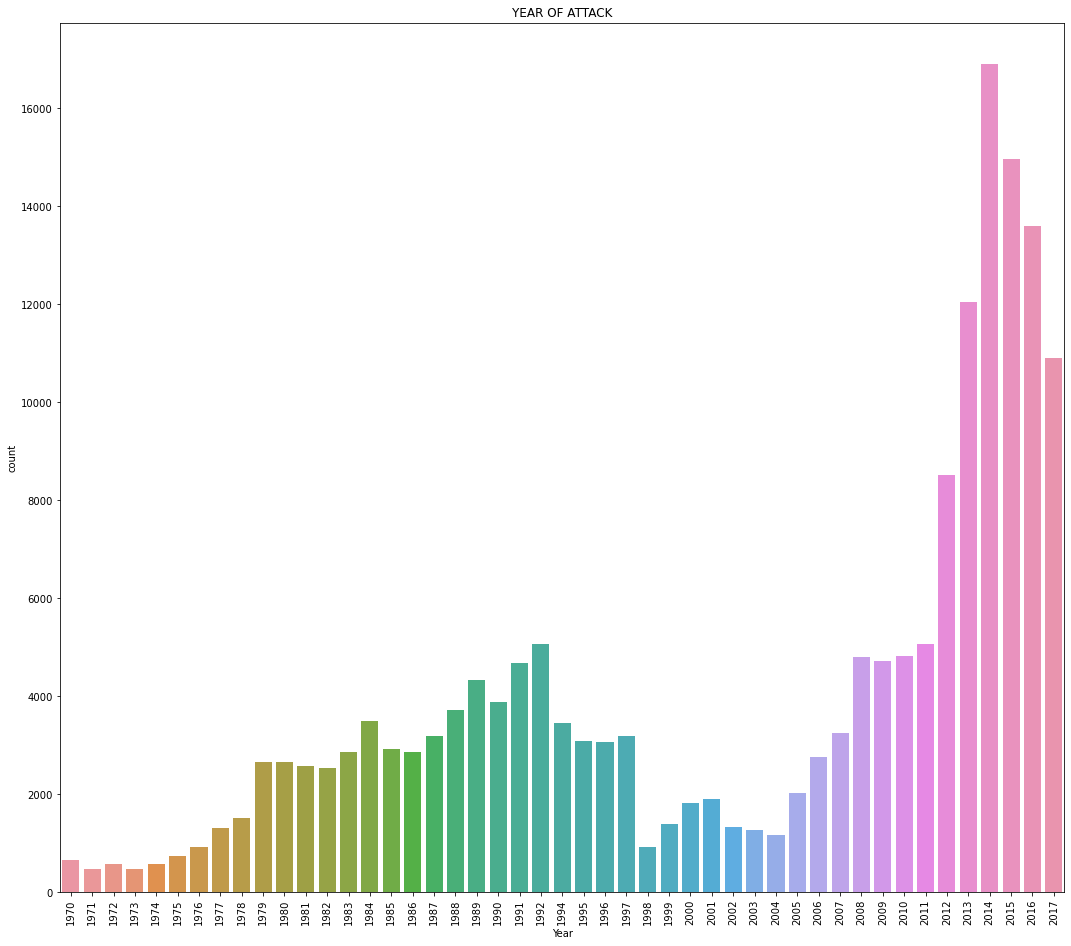

In [18]:
#YEAR
plt.figure(figsize=(18,16))
plb.xticks(rotation= 90)
plot1 = sns.countplot(x= clean_df['Year'].sort_values(), data= df)
plt.title('YEAR OF ATTACK')
plt.show()

FROM THE CHAT WE CAN SEE AS THE YEAR GOES BY THE RATE OF GLOBAL TERRORISM INCREASED WITH YEAR 2014 RECORDING THE HIGHEST RATE OF GLOBAL TERRORISM WHILE YEAR 1971 WITH THE LEAST RECORDED GLOBAL TERRORISM

In [19]:
#COUNTRY
country = pd.DataFrame(clean_df.groupby('Country')['Country'].size().sort_values(ascending=False))
country.columns = ['Count']
country_df = country.head(20)
country_df

,Count
Country,
Iraq,24636
Pakistan,14368
Afghanistan,12731
India,11960
Colombia,8306
Philippines,6908
Peru,6096
El Salvador,5320
United Kingdom,5235


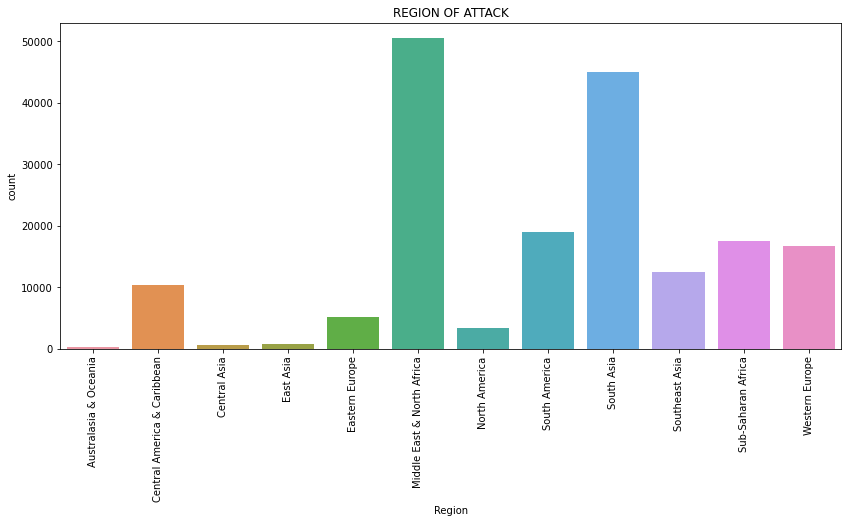

In [20]:
#REGION
plt.figure(figsize=(14,6))
plb.xticks(rotation= 90)
plot1 = sns.countplot(x= clean_df['Region'].sort_values(), data= df)
plt.title('REGION OF ATTACK')
plt.show()

The regions with the most occurence of global terrorism are Middle East& North Africa and South Asia While Australasia and Oceania is the least region with terrorism attack

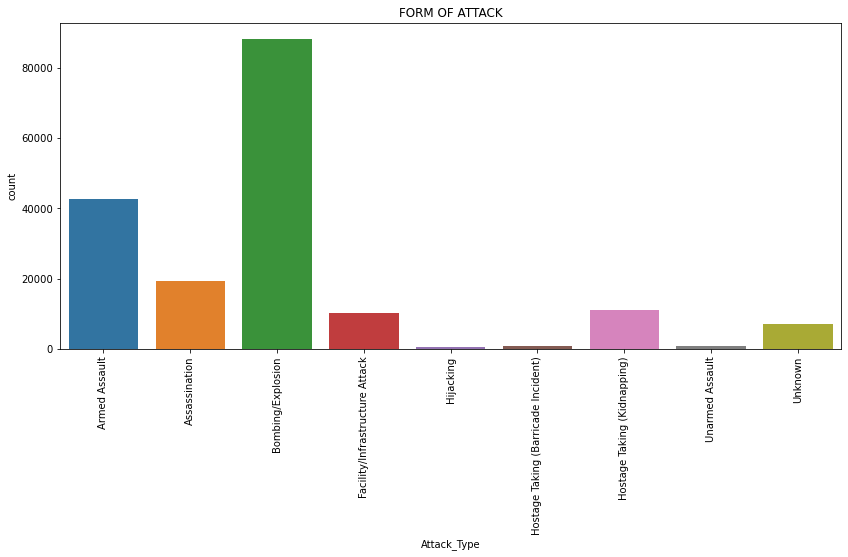

In [21]:
#ATTACK TYPE
plt.figure(figsize=(14,6))
plb.xticks(rotation= 90)
plot1 = sns.countplot(x= clean_df['Attack_Type'].sort_values(), data= df)
plt.title('FORM OF ATTACK')
plt.show()

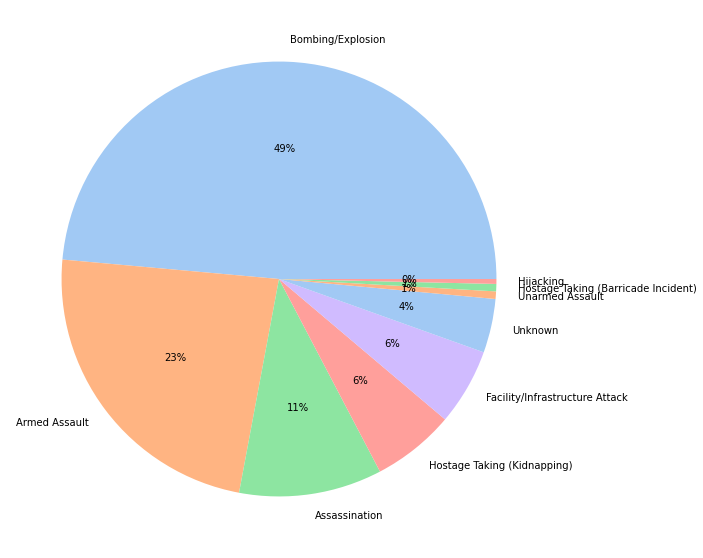

In [23]:
#trying pie chart for attack type data
attack = pd.DataFrame(clean_df.groupby('Attack_Type')['Attack_Type'].size().sort_values(ascending=False))
attack.columns = ['Count']

labels = list(attack.index)
#define Seaborn color palette to use
colors = sns.color_palette('pastel')[0:5]

#create pie chart
plt.figure(figsize=(10,10))
plt.pie(attack['Count'], labels = labels, colors = colors, autopct='%.0f%%')
plt.show()

The predominant form of attack in global terrorism has been carried out by the use of Bombing/Explosion (49%) followed by Armed Assault While Hijacking has been the least form used

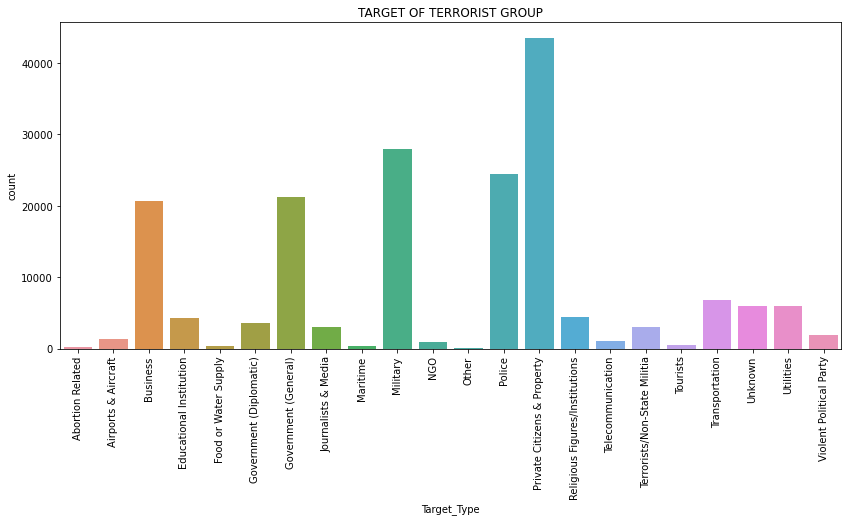

In [24]:
#Target Type
plt.figure(figsize=(14,6))
plb.xticks(rotation= 90)
plot1 = sns.countplot(x= clean_df['Target_Type'].sort_values(), data= df)
plt.title('TARGET OF TERRORIST GROUP')
plt.show()

The most targeted area of global terrorism has been Private Citizens & Property followed by the Military and the Police 

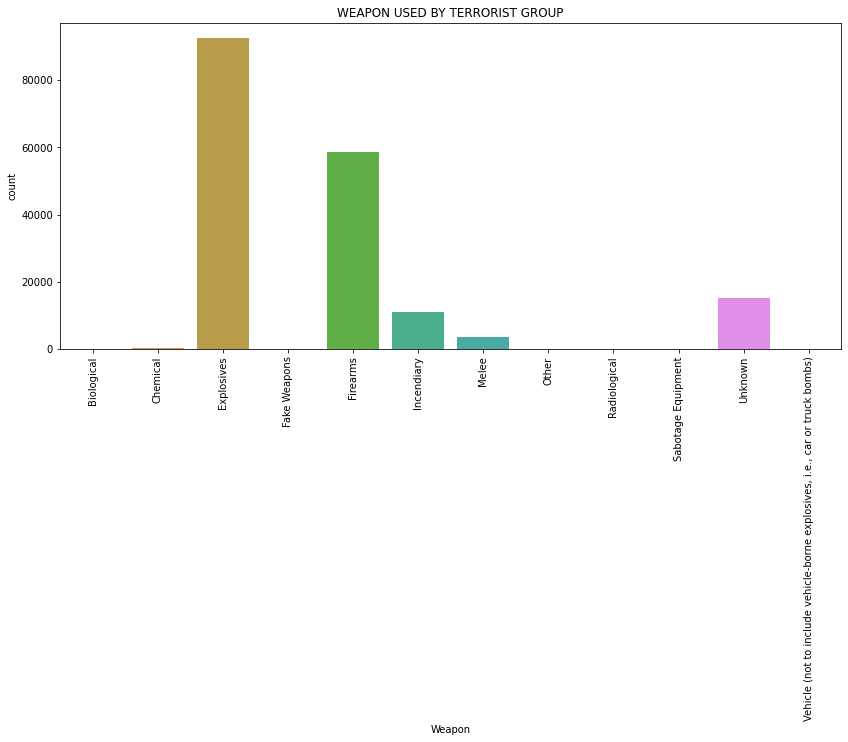

In [25]:
#Weapon Type
plt.figure(figsize=(14,6))
plb.xticks(rotation= 90)
plot1 = sns.countplot(x= clean_df['Weapon'].sort_values(), data= df)
plt.title('WEAPON USED BY TERRORIST GROUP')
plt.show()

Explosives and firearms constitute the most weapon used in global terrorism

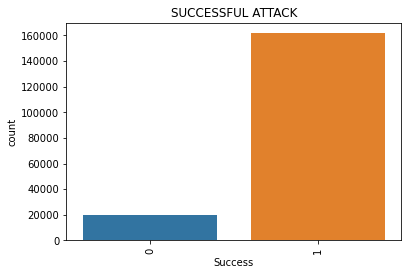

In [26]:
#Success in Attack
plt.figure(figsize=(6,4))
plb.xticks(rotation= 90)
plot1 = sns.countplot(x= clean_df['Success'].sort_values(), data= df)
plt.title('SUCCESSFUL ATTACK')
plt.show()

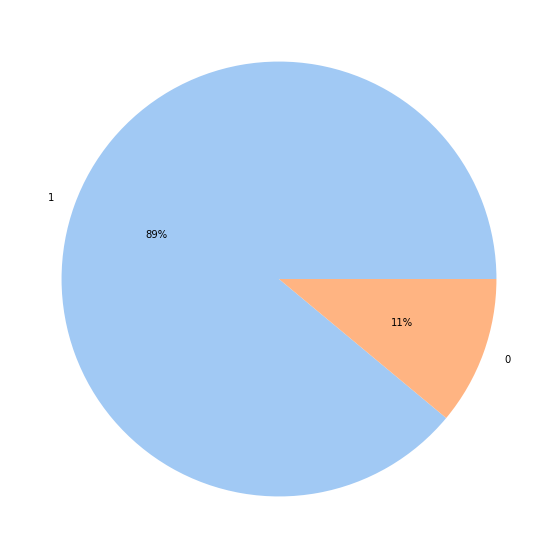

In [27]:
#determining the success rates of global terrorism attacks
success = pd.DataFrame(clean_df.groupby('Success')['Success'].size().sort_values(ascending=False))
success.columns = ['Count']

labels = list(success.index)
#define Seaborn color palette to use
colors = sns.color_palette('pastel')[0:5]

#create pie chart
plt.figure(figsize=(10,10))
plt.pie(success['Count'], labels = labels, colors = colors, autopct='%.0f%%')
plt.show()

89% of global terrorism attacks were successful over 47 years.

In [29]:
#Deaths Toll
No_Deaths = pd.DataFrame(clean_df.groupby('No_Of_Killed')['Region'].size().sort_values(ascending=True))
No_Deaths.columns = ['Count']
No_Deaths_df = No_Deaths.head(20)
No_Deaths_df

,Count
No_Of_Killed,
1570.0,1
212.0,1
210.0,1
208.0,1
205.0,1
188.0,1
184.0,1
171.0,1
168.0,1


The highest record of death during an attck has the figure as 1570

# DATA PREPROCESSING

In [30]:
#The independent variables will be tagged predictors_df while the dependent variable will be tagged target_df
predictors_df = clean_df.drop(columns='Attack_Group')
target_df = df['Attack_Group']
predictors_df.shape

(181691, 26)

In [31]:
target_df.nunique()

3537

In [32]:
#The following columns will be dropped from the predictors_df because it has object as it data type, it was done so as to rescale the dataset
independent_var_df = predictors_df.drop(columns = ['Country','Region','City','Attack_Type','Target_Type','Target_Subtype','Target','Target_Nationality','Weapon','gname','target1'], axis=1)
independent_var_df.shape

(181691, 15)

In [33]:
independent_var_df.dtypes

Year               int64
Month              int64
Day                int64
Extended           int64
Success            int64
Suicide            int64
No_Of_Killed     float64
No_Of_Wounded    float64
Property           int64
country            int64
region             int64
attacktype1        int64
targtype1          int64
natlty1          float64
weaptype1          int64
dtype: object

In [34]:
#RESCALING OF THE DATASET
#Rescaling of the dataset was done due to the large differnce between the minimum and maximum values across the entire dataset
#For the rescaling the feature_range will be from 0 t0 1 
scaler = MinMaxScaler(feature_range=(0,1))
rescaled_df = pd.DataFrame(scaler.fit_transform(independent_var_df), columns= independent_var_df.columns)
rescaled_df.head()

,Year,Month,Day,Extended,Success,Suicide,No_Of_Killed,No_Of_Wounded,Property,country,region,attacktype1,targtype1,natlty1,weaptype1
0,0.0,0.583333,0.064516,0.0,1.0,0.0,0.000637,0.0,0.9,0.054,0.090909,0.000,0.619048,0.054,1.000000
1,0.0,0.000000,0.000000,0.0,1.0,0.0,0.000000,0.0,0.9,0.126,0.000000,0.625,0.285714,0.017,1.000000
2,0.0,0.083333,0.000000,0.0,1.0,0.0,0.000637,0.0,0.9,0.156,0.363636,0.000,0.428571,0.213,1.000000
3,0.0,0.083333,0.000000,0.0,1.0,0.0,0.000000,0.0,1.0,0.074,0.636364,0.250,0.285714,0.213,0.416667
4,0.0,0.083333,0.000000,0.0,1.0,0.0,0.000000,0.0,1.0,0.097,0.272727,0.750,0.285714,0.213,0.583333


In [35]:
#NORMALIZATION
#From the visualization of the distribution using histogram it can be seen that some features in the dataset were not normal
#Therefore normalization was done to remove skewness from the dataset
scaler = Normalizer()
normalized_df = pd.DataFrame(scaler.fit_transform(rescaled_df), columns= rescaled_df.columns)
normalized_df.head()

,Year,Month,Day,Extended,Success,Suicide,No_Of_Killed,No_Of_Wounded,Property,country,region,attacktype1,targtype1,natlty1,weaptype1
0,0.0,0.309525,0.034233,0.0,0.530614,0.0,0.000338,0.0,0.477552,0.028653,0.048238,0.000000,0.328475,0.028653,0.530614
1,0.0,0.000000,0.000000,0.0,0.550613,0.0,0.000000,0.0,0.495552,0.069377,0.000000,0.344133,0.157318,0.009360,0.550613
2,0.0,0.046566,0.000000,0.0,0.558794,0.0,0.000356,0.0,0.502915,0.087172,0.203198,0.000000,0.239483,0.119023,0.558794
3,0.0,0.049976,0.000000,0.0,0.599707,0.0,0.000000,0.0,0.599707,0.044378,0.381632,0.149927,0.171345,0.127738,0.249878
4,0.0,0.047174,0.000000,0.0,0.566092,0.0,0.000000,0.0,0.566092,0.054911,0.154389,0.424569,0.161741,0.120578,0.330220


In [36]:
normalized_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,181691.0,0.344432,0.136270,0.0,0.229120,0.387754,0.450244,0.842292
Month,181691.0,0.267048,0.135436,0.0,0.154847,0.270480,0.378742,0.741281
Day,181691.0,0.247688,0.137066,0.0,0.131602,0.250668,0.361875,0.824486
Extended,181691.0,0.019105,0.087969,0.0,0.000000,0.000000,0.000000,0.633873
Success,181691.0,0.443708,0.165159,0.0,0.442536,0.486424,0.528534,0.856270
Suicide,181691.0,0.016343,0.084238,0.0,0.000000,0.000000,0.000000,0.671943
No_Of_Killed,181691.0,0.000705,0.003190,0.0,0.000000,0.000000,0.000548,0.398587
No_Of_Wounded,181691.0,0.000170,0.001712,0.0,0.000000,0.000000,0.000106,0.375916
Property,181691.0,0.424622,0.166443,0.0,0.418172,0.466120,0.512870,0.871719
country,181691.0,0.064400,0.056186,0.0,0.036264,0.051529,0.084109,0.567453


Standard deviation, minimum and maximum appear to be on a scaled range and can therfore be used for engineering and modelling

In [37]:
#writing a new file
normalized_df.to_csv('normalized_df.csv')

In [38]:
#clean dataset wthout preprocessing
clean_df.to_csv('clean_df.csv')